In [1]:
%pylab inline
%config InlineBackend.figure_format='retina'
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [5]:
df_ps02 = pd.read_csv('data/03_PS2.csv')
df_micron = df_ps02['D50_micron']
t_min = df_ps02['Time_min']
df_ps02.head()

,Time_min,D16_micron,D50_micron,D84_micron
0,1.0,12.7335,20.6013,39.3249
1,2.0,13.2074,23.8470,45.4082
2,3.0,13.8934,25.3438,65.4272
3,4.0,14.1042,25.6631,49.8698
4,5.0,10.0286,19.1833,36.1036


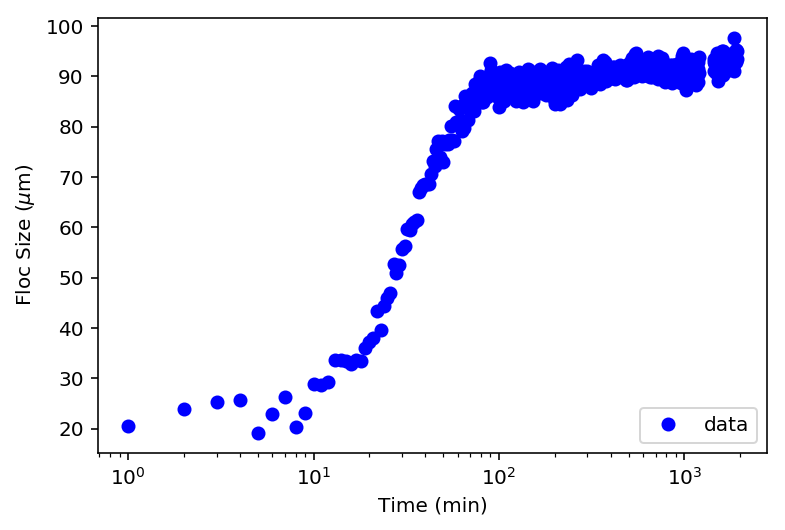

In [6]:
fig, ax = plt.subplots()
ax.plot(t_min,df_micron,'ob', label='data')
ax.set_xscale('log'),
ax.set_xlabel('Time (min)')
ax.set_ylabel('Floc Size ($\mu$m)')
legend(loc=4);

In [7]:
df = df_micron/10**6
t_sec = t_min*60

In [ ]:
def dDdt(D, t, k):
    """
    ODE to be integrated: dDdt = A-B
    """
    # kind of constant:
    nf = 2.25
    p = 3.-nf
    q = 0.5
    Fy = 1e-10 # (N)
    rhos = 2500.  # (kg/m3)
    mu = 1.002e-3 # dynamic viscosity @ 20 degC (N s m-2)
    
    # adjustable (passed in in array k)
    Ka = k[0]
    Kb = k[1]
    Dp = k[2]
    G =  k[3]
    C =  k[4]
    
    # aggregation and breakup terms
    A = D**(4-nf)*Ka*Dp**(nf-3)*G*C/(nf*rhos)
    B = (D-Dp)**p * D**(2*q+1) *Kb *((Dp**(-p))/nf) *(mu/Fy)**q *G**(q+1)
    dfdt = A-B
    return dfdt
